In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/home/sky3alfory/anaconda3/envs/ABC/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
clean_data = pd.read_parquet('/home/sky3alfory/NCIA_ESS/Forecasting/Clean_panli/20230321.parquet')
data = pd.read_parquet('/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20230321.parquet_SOC_slope_0.1')
data2 = pd.read_parquet('/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20230321.parquet_SOC_slope_0.9')
data.head()

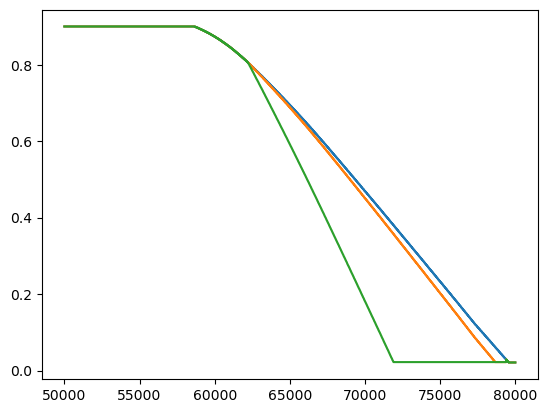

In [67]:
plt.plot(clean_data['BANK_SOC'][50000:80000])
plt.plot(data['BANK_SOC'][50000:80000])
plt.plot(data2['BANK_SOC'][50000:80000])

BANK_SOC 출력

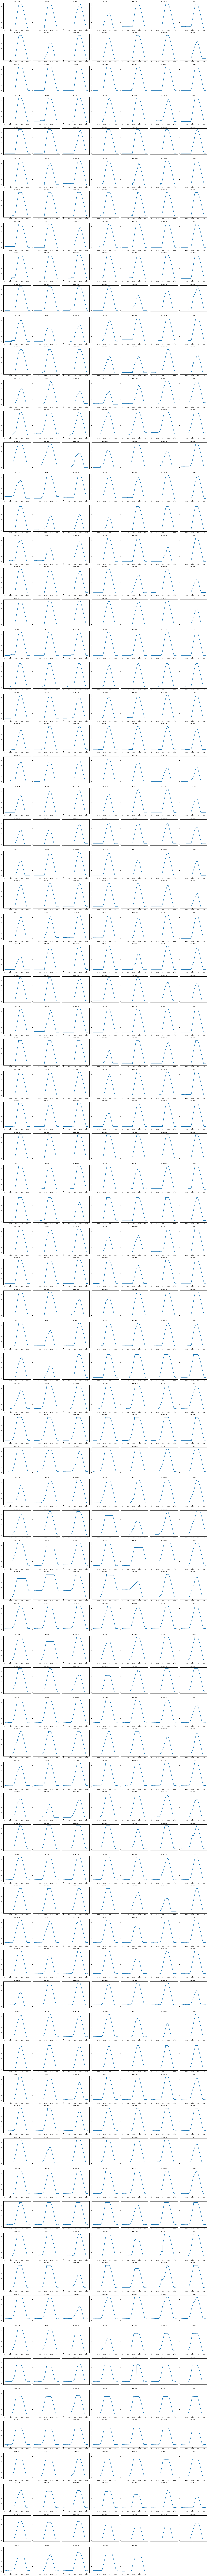

In [3]:
# 데이터 폴더 경로
folder_dir = '/data/ess/data/incell/year45_preprocessed/2'

# 모든 parquet 파일 경로 불러오기
files = sorted([os.path.join(folder_dir, f) 
                for f in os.listdir(folder_dir) if f.endswith('.parquet')])

# subplot 설정
n_cols = 7
n_rows = (len(files) + n_cols - 1) // n_cols  # 파일 개수에 맞춰 행 수 계산
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharey=True)

# axes를 1차원 배열로 변환
axes = axes.flatten()

for i, file_path in enumerate(files):
    df = pd.read_parquet(file_path)
    axes[i].plot(df['BANK_SOC'])
    axes[i].set_title(os.path.basename(file_path).replace('.parquet', ''), fontsize=8)
    axes[i].tick_params(axis='x', labelsize=6)
    axes[i].tick_params(axis='y', labelsize=6)

# 남는 subplot은 숨기기
for j in range(len(files), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


BANK_VOLTAGE 출력

In [ ]:
fig2, axes2 = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharey=True)

# axes를 1차원 배열로 변환
axes2 = axes2.flatten()

for i, file_path in enumerate(files):
    df = pd.read_parquet(file_path)
    axes2[i].plot(df['BANK_DC_VOLT'])
    axes2[i].set_title(os.path.basename(file_path).replace('.parquet', ''), fontsize=8)
    axes2[i].tick_params(axis='x', labelsize=6)
    axes2[i].tick_params(axis='y', labelsize=6)

# 남는 subplot은 숨기기
for j in range(len(files), len(axes2)):
    axes2[j].axis('off')

plt.tight_layout()
plt.show()

In [20]:
syn_data=pd.read_parquet('/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220826.parquet_SOC_slope_0.0')
# syn_data.head()
len(syn_data)

86400

Clean sample SoC slope npy 변환 후 합치기

In [4]:
import os, glob, re
import numpy as np
import pandas as pd

from pathlib import Path

root = Path("/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis")  # 시작 폴더

for subdir in root.rglob("*"):
    if subdir.is_dir():

        name = subdir.name
        folder = f"/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/{name}"
        print(folder)
        base   = f"{name}.parquet_SOC_slope_"
        out    = os.path.join(folder, f"{name}_concat.npy")

        # 파일을 intensity 숫자 기준으로 정렬
        paths = glob.glob(os.path.join(folder, f"{base}*"))
        get_int = lambda p: float(re.search(rf"{re.escape(base)}([0-9.]+)$",
                                            os.path.basename(p)).group(1))
        paths = sorted(paths, key=get_int)

        # 첫 파일 기준으로 사용할 열(= TIMESTAMP/INTENSITY 제외)
        df0 = pd.read_parquet(paths[0])
        cols = [c for c in df0.columns if c not in ("TIMESTAMP", "INTENSITY")]

        # 값만 추출해서 세로로 이어붙이기
        arrs = []
        for p in paths:
            df = pd.read_parquet(p)
            df = df.drop(columns=[c for c in ("TIMESTAMP","INTENSITY") if c in df.columns])
            df = df[cols]  # 열 순서 고정
            arrs.append(df.to_numpy())

        big = np.concatenate(arrs, axis=0)
        np.save(out, big)
        print("saved:", out, big.shape)

/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220508


saved: /home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220508/20220508_concat.npy (950400, 7)
/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220328
saved: /home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220328/20220328_concat.npy (950400, 7)
/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220407
saved: /home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220407/20220407_concat.npy (950400, 7)
/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220424
saved: /home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220424/20220424_concat.npy (950400, 7)
/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220420
saved: /home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220420/20220420_concat.npy (950400, 7)
/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220412
saved: /home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220412/20220412_concat.npy (950400, 7)
/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220403
saved: /home/sky3alfory/NCIA_ESS/F

IndexError: list index out of range

In [29]:
concat_data = np.load('/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220826_concat.npy',allow_pickle=True)

In [32]:
concat_data.shape

(950400, 7)

25.08.12 SoC_synthesize 수정
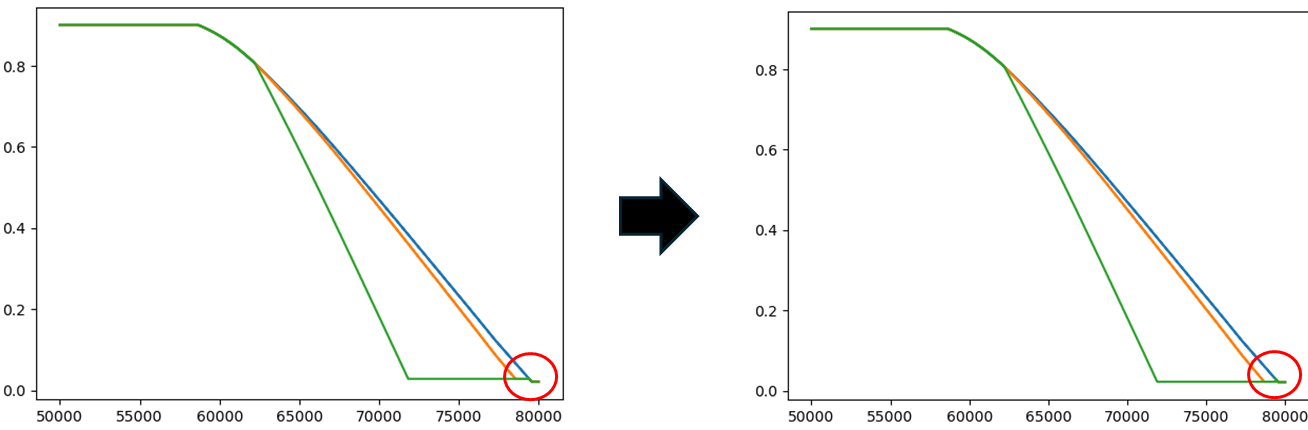

0.47073327746890636
/home/sky3alfory/NCIA_ESS


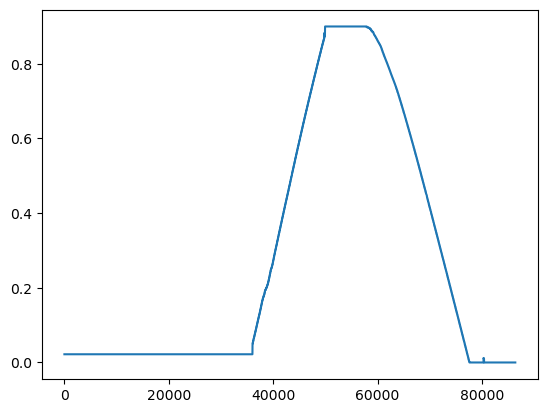

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
from soc_slope_synthesis import calculate_soc_slope

sys.path.insert(0,str(Path.cwd().resolve().parents[1]))

data_path = '/home/sky3alfory/NCIA_ESS/Forecasting/SoC_synthesis/20220826_SOC_slope_0.3.parquet'

data = pd.read_parquet(data_path)

print(calculate_soc_slope(data))

# for k in data.keys() :
#  print(k)

plt.plot(data['BANK_SOC'])

print(Path.cwd().resolve().parents[1])
